# Mushroom Classification using ML

### Submitted by Ashmina T

**Objective:** To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied). Also, if some data pre-processing is necessary do that as well.

#### Feature description  
• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s  
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s  
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y  
• bruises: bruises=t, no=f  
• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s  
• gill-attachment: attached=a, descending=d, free=f, notched=n  
• gill-spacing: close=c, crowded=w, distant=d  
• gill-size: broad=b, narrow=n  
• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y  
• stalk-shape: enlarging=e, tapering=t  
• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?  
• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s  
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s  
• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y  
• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y  
• veil-type: partial=p, universal=u  
• veil-colour: brown=n, orange=o, white=w, yellow=y  
• ring-number: none=n, one=o, two=t  
• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z  
• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y  
• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y  
• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,CategoricalNB

In [2]:
#loading the dataset
data = pd.read_csv('mushrooms.csv')

In [3]:
#displaying first 5 rows
pd.pandas.set_option('display.max_columns',None)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

The dataset contains 8124 rows and 23 columns.

In [5]:
#concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the columns are categorical.

### Pre-processing

In [6]:
#checking for missing values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset.

In [7]:
#displaying unique values in each column
for col in data.columns:
    print(col, " : ", data[col].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


The question mark('?') in the stalk-root column indicates that the respective mushroom lacks stalk root. So, I consider this as a valid value and not a missing one.

As these columns are categorical, containing meaningful unique values, there are no outliers in the dataset.

Now we have to convert the categorical columns into numerical columns using encoding techniques. Since all the 23 columns are categorical one-hot encoding can lead to high memory consumption. So we can use Label Encoding.

In [8]:
#label encoding
encoder = LabelEncoder()
data = data.apply(encoder.fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [9]:
#splitting the dataset into feature matrix and target vector
X = data.drop(['class'],axis=1)
y = data['class']

In [10]:
#dimension of feature matrix
X.shape

(8124, 22)

In [11]:
#dimension of target vector
y.shape

(8124,)

### Modeling

In [12]:
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#### Logistic Regression

In [13]:
#logistic regression
log_model = LogisticRegression(max_iter=400)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.2f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))


Accuracy score =0.95
Confusion Matrix:
 [[799  44]
 [ 41 741]]


There are 85 misclassifications.

#### KNN

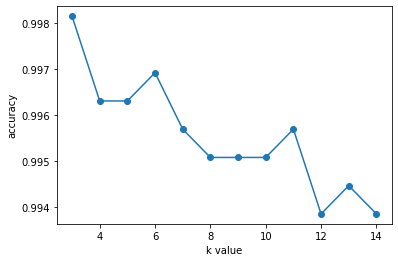

In [14]:
acc_scores = []
#to find optimum k value, we have to use varied k values
neighbors = np.arange(3,15)
#creating a loop for each KNN values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_scores.append(acc)

#checking for which k value we got highest accuracy
plt.plot(neighbors,acc_scores,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

optimum number of neighbours is 6.

In [15]:
#implementing KNN with number of neighbours as 6
knn_model = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.997
Confusion Matrix:
 [[838   5]
 [  0 782]]


There are 5 misclassifications.

#### SVM

In [16]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)
y_pred = svm_radial.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.993
Confusion Matrix:
 [[842   1]
 [ 11 771]]


There are 12 misclassifications.

#### Decision Tree Classifier

In [17]:
#implementing decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =1.000
Confusion Matrix:
 [[843   0]
 [  0 782]]


There are no misclassifications. Decision Tree classifier predicted the mushroom classes(edible or poisonous) for the test data with 100% accuracy.

#### Random Forest Classifier

In [18]:
#implementing random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =1.000
Confusion Matrix:
 [[843   0]
 [  0 782]]


There are no misclassifications. Random Forest Classifier also predicted the test data labels with 100% accuracy.

#### Naive Bayes Classifier

In [19]:
#implementing Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.922
Confusion Matrix:
 [[771  72]
 [ 55 727]]


There are 127 misclassifications.

In [20]:
#implementing Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.807
Confusion Matrix:
 [[792  51]
 [262 520]]


There are 313 misclassifications.

In [21]:
#implementing Categorical Naive Bayes classifier
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train,y_train)
y_pred = nb_classifier.predict(X_test)

#measuring performance
print('Accuracy score ={:.3f}'.format(accuracy_score(y_pred,y_test)))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy score =0.951
Confusion Matrix:
 [[837   6]
 [ 74 708]]


There are 80 misclassifications.

Out of the three Naive Bayes classifiers, CategoricalNB performed well since all our features are categorical.

Out of all the supervised learning models which I used, Decision Tree and Random forest classifiers performed well with a 100% accuracy in predicting the class labels for the test data.